# FRE 7871: Project

## 1. Preprocessing

### 1.1 import the data

In [3]:
import nltk
import re
import math
import string
from sklearn.metrics import confusion_matrix
import scipy.sparse as sparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
states = pd.read_csv('state abbr.csv', encoding = 'utf-8')

In [3]:
data = pd.read_csv('Corona_NLP_train.csv', encoding = 'utf-8')

In [4]:
data = data[data.Location.notnull()]

In [5]:
data = data[data['Location'].str.contains('|'.join(states['State'].tolist()))]

### 1.2 clean the text and remove non_text data

In [6]:
def clean_text(text):
    # Make text lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers
    # Use re.sub to substitude all that with ''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)                              # remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)                # remove links
    text = re.sub('<.*?>+', '', text)                               # remove text in angle brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text)                                   # remove line break
    text = re.sub('\w*\d\w*', '', text)                             # remove words containing numbers
    return(text)

In [7]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, '', text)
    return(text)

In [8]:
data['text'] = data['OriginalTweet'].apply(lambda x: clean_text(x))

In [9]:
data['text'] = data['text'].apply(lambda x: remove_emoji(x))

## 2. word vectorization

### 2.1 TF-IDF (term frequency–inverse document frequency) vectorization

In [10]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#### TF without IDF

In [11]:
tf_vec = TfidfVectorizer(stop_words = nltk.corpus.stopwords.words(), use_idf=False, norm='l2')
tf = tf_vec.fit_transform(data['text'].tolist())
print(tf)
#tf_df = pd.DataFrame((value, word) for word, value in zip(
#    tf.toarray().tolist()[0], tf_vec.get_feature_names()))
#tf_df.columns = ['Word', 'TF']
#tf_df.sort_values('TF', ascending=False, inplace=True)
#tf_df.head()

//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'onların', 'printr', 'sekurang', 'setidak', 'tama', 'tidaknya', 'δι', 'арбаң', 'арсалаң', 'афташ', 'бай', 'бале', 'баски', 'батыр', 'баҳри', 'болои', 'бүгжең', 'бұтыр', 'валекин', 'вақте', 'вой', 'вуҷуди', 'гар', 'гарчанде', 'далаң', 'даме', 'ербелең', 'жалт', 'жұлт', 'карда', 'кошки', 'куя', 'күңгір', 'кӣ', 'магар', 'майлаш', 'митың', 'модоме', 'нияти', 'онан', 'оре', 'паһ', 'рӯи', 'салаң', 'сар', 'сұлаң', 'сұрт', 'тарбаң', 'тразе', 'ту', 'тыржың', 'тұрс', 'хом', 'хуб', 'чаро', 'чи', 'чун', 'чунон', 'шарте', 'шұңқ', 'ыржың', 'қадар', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'ҳай', 'ҳамин', 'ҳатто', 'ҳо', 'ҳол', 'ҳолате', 'әттеген', 'ӯим', 'अक', 'अग', 'अझ', 'अन', 'अर', 'आजक', 'आत', 'आद', 

  (0, 5283)	0.20851441405707477
  (0, 14554)	0.20851441405707477
  (0, 16758)	0.20851441405707477
  (0, 2958)	0.20851441405707477
  (0, 1047)	0.20851441405707477
  (0, 12212)	0.20851441405707477
  (0, 18969)	0.20851441405707477
  (0, 2189)	0.20851441405707477
  (0, 2950)	0.20851441405707477
  (0, 11689)	0.20851441405707477
  (0, 18255)	0.20851441405707477
  (0, 19168)	0.20851441405707477
  (0, 1494)	0.20851441405707477
  (0, 11221)	0.20851441405707477
  (0, 10579)	0.20851441405707477
  (0, 3526)	0.20851441405707477
  (0, 13497)	0.20851441405707477
  (0, 12175)	0.20851441405707477
  (0, 12927)	0.20851441405707477
  (0, 12273)	0.20851441405707477
  (0, 11820)	0.20851441405707477
  (0, 17467)	0.20851441405707477
  (0, 18391)	0.20851441405707477
  (1, 5083)	0.2672612419124244
  (1, 11578)	0.5345224838248488
  :	:
  (8854, 16682)	0.25
  (8854, 19158)	0.25
  (8854, 16728)	0.25
  (8854, 2107)	0.25
  (8854, 6952)	0.25
  (8854, 11608)	0.25
  (8854, 10113)	0.25
  (8855, 3681)	0.2886751345948129


In [12]:
tf.shape

(8857, 19817)

In [13]:
tfidf_vec = TfidfVectorizer(stop_words = nltk.corpus.stopwords.words(), use_idf=True) # norm='l2'
tfidf = tfidf_vec.fit_transform(data['text'].tolist())
print(tfidf)

//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'onların', 'printr', 'sekurang', 'setidak', 'tama', 'tidaknya', 'δι', 'арбаң', 'арсалаң', 'афташ', 'бай', 'бале', 'баски', 'батыр', 'баҳри', 'болои', 'бүгжең', 'бұтыр', 'валекин', 'вақте', 'вой', 'вуҷуди', 'гар', 'гарчанде', 'далаң', 'даме', 'ербелең', 'жалт', 'жұлт', 'карда', 'кошки', 'куя', 'күңгір', 'кӣ', 'магар', 'майлаш', 'митың', 'модоме', 'нияти', 'онан', 'оре', 'паһ', 'рӯи', 'салаң', 'сар', 'сұлаң', 'сұрт', 'тарбаң', 'тразе', 'ту', 'тыржың', 'тұрс', 'хом', 'хуб', 'чаро', 'чи', 'чун', 'чунон', 'шарте', 'шұңқ', 'ыржың', 'қадар', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'ҳай', 'ҳамин', 'ҳатто', 'ҳо', 'ҳол', 'ҳолате', 'әттеген', 'ӯим', 'अक', 'अग', 'अझ', 'अन', 'अर', 'आजक', 'आत', 'आद', 

  (0, 18391)	0.258636621635752
  (0, 17467)	0.1671735674624728
  (0, 11820)	0.20076590464999672
  (0, 12273)	0.20076590464999672
  (0, 12927)	0.22362400184816142
  (0, 12175)	0.12384771028499776
  (0, 13497)	0.24382875898840384
  (0, 3526)	0.18028941247112795
  (0, 10579)	0.18460985731005922
  (0, 11221)	0.2217654787814709
  (0, 1494)	0.21915351616264284
  (0, 19168)	0.17433946975803713
  (0, 18255)	0.17844513782054897
  (0, 11689)	0.17645186623408135
  (0, 2950)	0.24745045331757268
  (0, 2189)	0.15898955692921068
  (0, 18969)	0.3229785175261114
  (0, 12212)	0.1725649181599551
  (0, 1047)	0.2799156631877043
  (0, 2958)	0.30904093689125334
  (0, 16758)	0.08266168224662723
  (0, 14554)	0.1430710156863644
  (0, 5283)	0.14428380346945968
  (1, 3681)	0.09972151948850481
  (1, 19270)	0.40629281207189455
  :	:
  (8854, 7069)	0.16219478948770516
  (8854, 7398)	0.1717533969317686
  (8854, 14691)	0.16404225065413075
  (8854, 13432)	0.10443807334113049
  (8854, 7329)	0.1424021853826043
  (8854, 7

In [14]:
tf.toarray().shape

(8857, 19817)

In [15]:
tfidf.shape

(8857, 19817)

#### TF-IDF

In [16]:
tfidf_vec = TfidfVectorizer(stop_words = nltk.corpus.stopwords.words(), use_idf=True) # norm='l2'
#tfidf = tfidf_vec.fit_transform(data['text'].tolist())
tfidf = tfidf_vec.fit_transform(data['text'].tolist())
#tfidf_df = pd.DataFrame((value, word) for word, value in zip(
#    tfidf.toarray().tolist()[0], tfidf_vec.get_feature_names()))
#tfidf_df.columns = ['Word', 'TF-IDF']
#tfidf_df.sort_values('TF-IDF', ascending=False, inplace=True)
#tfidf_df.head()


//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'onların', 'printr', 'sekurang', 'setidak', 'tama', 'tidaknya', 'δι', 'арбаң', 'арсалаң', 'афташ', 'бай', 'бале', 'баски', 'батыр', 'баҳри', 'болои', 'бүгжең', 'бұтыр', 'валекин', 'вақте', 'вой', 'вуҷуди', 'гар', 'гарчанде', 'далаң', 'даме', 'ербелең', 'жалт', 'жұлт', 'карда', 'кошки', 'куя', 'күңгір', 'кӣ', 'магар', 'майлаш', 'митың', 'модоме', 'нияти', 'онан', 'оре', 'паһ', 'рӯи', 'салаң', 'сар', 'сұлаң', 'сұрт', 'тарбаң', 'тразе', 'ту', 'тыржың', 'тұрс', 'хом', 'хуб', 'чаро', 'чи', 'чун', 'чунон', 'шарте', 'шұңқ', 'ыржың', 'қадар', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'ҳай', 'ҳамин', 'ҳатто', 'ҳо', 'ҳол', 'ҳолате', 'әттеген', 'ӯим', 'अक', 'अग', 'अझ', 'अन', 'अर', 'आजक', 'आत', 'आद', 

In [16]:
#tfidf_df.shape#

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

In [37]:
NB = MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)
NB.fit(tfidf, data['Sentiment'])

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [39]:
print(cross_val_score(NB,tfidf, data['Sentiment'] , cv=5))

[0.37824126 0.40157924 0.38904574 0.39774011 0.37535331]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Text(80.90000000000006, 0.5, 'predicted label')

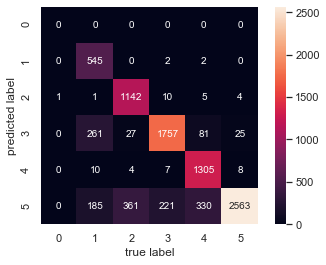

In [42]:
mat = confusion_matrix(data['Sentiment'], y_predict)
sns.heatmap(mat.T, square=True, annot=True,fmt="d")
plt.xlabel('true label')
plt.ylabel('predicted label')

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [51]:
#train Randomforest model
trees=1000
max_depth=10
#100 trees are enough
model=RandomForestClassifier(n_estimators=trees,random_state=0,max_depth=max_depth)
model.fit(tfidf, data['Sentiment'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
y_predict =model.predict(tfidf)
print(accuracy_score(data['Sentiment'],y_predict))

0.2988596590267585


In [49]:
print(cross_val_score(model,tfidf, data['Sentiment'] , cv=5))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.29481398 0.29723632 0.29361942 0.29378531 0.29395138]


### 2.2 word2vec 

In [17]:
from gensim.models.word2vec import Word2Vec
import gensim
sentences = [nltk.word_tokenize(_) for _ in data['text'].tolist()]

In [18]:
model = Word2Vec()  # build model
model.build_vocab(sentences) # build vocabulary
model.train(sentences, total_examples = model.corpus_count, epochs = model.epochs) # train the model

(855834, 1236680)

#### word vector

#### cosine similarity for 2 words

In [20]:
model.wv.similarity('understanding', 'classes')

0.9923096

#### cosine similarity for 2 word sets

In [21]:
model.wv.n_similarity(['understanding', 'classes'], ['open', 'store'])

0.703936

In [28]:
print(model)

Word2Vec(vocab=4209, size=100, alpha=0.025)


# 1.4 KMeans Unsupervised Learning for Sentiment Analysis

In [29]:
import sklearn
from sklearn.cluster import KMeans
word_vectors = model.wv
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors)

#figure out the positive and negative cluster center of the words
positive_cluster_center = kmeans.cluster_centers_[0]
negative_cluster_center = kmeans.cluster_centers_[1]

In [65]:
word_vectors.similar_by_vector(kmeans.cluster_centers_[0], topn=50, restrict_vocab=None)

[('whats', 0.9993171691894531),
 ('what\x92s', 0.9991989731788635),
 ('start', 0.9990618228912354),
 ('rules', 0.9989457130432129),
 ('wage', 0.9989343881607056),
 ('deliveries', 0.9987987279891968),
 ('smaller', 0.9987094402313232),
 ('fill', 0.9986801147460938),
 ('we\x92re', 0.9986801147460938),
 ('near', 0.9986141324043274),
 ('thru', 0.9985823631286621),
 ('twitter', 0.9985329508781433),
 ('paid', 0.9985020160675049),
 ('cooking', 0.9984216690063477),
 ('contaminated', 0.9984185099601746),
 ('lose', 0.9983917474746704),
 ('spreading', 0.9983611702919006),
 ('corporations', 0.9983470439910889),
 ('checking', 0.9983452558517456),
 ('they\x92re', 0.9983090162277222),
 ('process', 0.9983006715774536),
 ('arent', 0.9982805252075195),
 ('safer', 0.9982684850692749),
 ('worst', 0.9982439279556274),
 ('tx', 0.9982157945632935),
 ('private', 0.9981994032859802),
 ('blue', 0.9981851577758789),
 ('recently', 0.9981381297111511),
 ('bars', 0.9981337189674377),
 ('stress', 0.998129665851593),


In [66]:
word_vectors.similar_by_vector(kmeans.cluster_centers_[1], topn=50, restrict_vocab=None)

[('plan', 0.9994263052940369),
 ('democratic', 0.99924236536026),
 ('asking', 0.9992196559906006),
 ('elections', 0.9992192983627319),
 ('weve', 0.9992035627365112),
 ('newyorkcity', 0.9991694688796997),
 ('human', 0.9991687536239624),
 ('cdcgov', 0.9990737438201904),
 ('senate', 0.999046802520752),
 ('wall', 0.9990323781967163),
 ('red', 0.9990077614784241),
 ('student', 0.9989444613456726),
 ('bill', 0.9989262819290161),
 ('justice', 0.9989054203033447),
 ('threats', 0.9988794326782227),
 ('austin', 0.9988794326782227),
 ('uk', 0.9988789558410645),
 ('todays', 0.9988695383071899),
 ('communication', 0.9988325834274292),
 ('example', 0.9988299608230591),
 ('teens', 0.998826265335083),
 ('dc', 0.9988205432891846),
 ('months', 0.9988035559654236),
 ('ban', 0.998796284198761),
 ('foods', 0.998795747756958),
 ('breaks', 0.9987812638282776),
 ('million', 0.9987601041793823),
 ('chinese', 0.9987263679504395),
 ('within', 0.9987238645553589),
 ('ahead', 0.9987195730209351),
 ('briefing', 0.9

We could find in in the nearest words, the first center have some words like 'safer', 'protecting','tomorrow', so it would be the positive center, and the other one is the negative center

In [32]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: kmeans.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

#label the sentiment direction by the distance to the center and get the sentiment_coeff
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(kmeans.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
words = words.set_index('words')

In [34]:
words.head()

,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
words,,,,,
due,"[-0.45658177, -0.49415156, 0.3454461, -0.94395...",0,1,0.449421,0.449421
to,"[-0.30263138, 0.24481553, 0.106878765, -0.3677...",0,1,0.401669,0.401669
our,"[-0.29039687, 0.0315191, 0.4806313, -0.6199161...",0,1,0.451599,0.451599
retail,"[-0.56082296, 0.0695197, 0.40226996, -0.718389...",0,1,0.281456,0.281456
store,"[-1.0768391, -0.13815445, 0.18461855, -0.67597...",0,1,0.138291,0.138291


In [35]:
features = tfidf_vec.get_feature_names()
dic = {}
for i in features:
    if i in words.index:
        dic[i] = words.loc[i,'sentiment_coeff']
    else:
        dic[i] = 0

Multiply the sentiment score with the Tfidf value and sum it up in one twitter, we could get a result about the twitter's sentiment

In [36]:
features_vec = np.array(list(dic.values())).reshape(len(dic),1)
result = np.dot(tfidf.toarray(),features_vec)

In [67]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Unnamed: 6,Unnamed: 7,Unnamed: 8,text,result,label
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,NaN,NaN,NaN,due to our retail store and classroom in atla...,-2.344909,Negative
13,3812,48764,"Chicago, IL",16-03-2020,"Me: I don't need to stock up on food, I'll jus...",Positive,NaN,NaN,NaN,me i dont need to stock up on food ill just ha...,-1.239168,Negative
19,3818,48770,"Denver, CO",16-03-2020,"For those who aren't struggling, please consid...",Positive,NaN,NaN,NaN,for those who arent struggling please consider...,-0.397285,Neutral
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative,NaN,NaN,NaN,do you see malicious price increases in nyc th...,-0.043553,Neutral
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative,NaN,NaN,NaN,soon with dwindling supplies unlawful panicky...,0.537376,Positive


Since it would be hard to understand the result value, it would be hard to divide them into five groups, especially the 'Extremely Positive' and 'Extremely Negative' groups, so We firstly divide them into 3 different groups: Positive, Neutral and Negative.

In [57]:
data['result'] = result
data['label'] = 0
for i in data.index:
    if data.loc[i,'result'] > 0.2:
        data.loc[i,'label'] = 'Positive'
    if data.loc[i,'result'] < 0.2 and data.loc[i,'result'] > -0.2:
        data.loc[i,'label'] = 'Neutral'
    if data.loc[i,'result'] < -0.2:
        data.loc[i,'label'] = 'Negative'

In [58]:
count = 0
for i in data.index:
    if data.loc[i,'label']=='Positive' and data.loc[i,'Sentiment'] in ['Positive','Extremely Positive']:
        count += 1
    if data.loc[i,'label']=='Negative' and data.loc[i,'Sentiment'] in ['Negative','Extremely Negative']:
        count += 1
    if data.loc[i,'label']==data.loc[i,'Sentiment']:
        count += 1
acc = count/data.shape[0]

we could find that when dealing with the 3 groups, the unsupervised model plays normally, having about 60% accuracy

In [59]:
acc

0.589364344586203

Then divide the groups into five different groups

In [60]:
data['result'] = result
data['label'] = 0
for i in data.index:
    if data.loc[i,'result'] > 4:
        data.loc[i,'label'] = 'Extremely Positive'
    if data.loc[i,'result'] < 4 and data.loc[i,'result'] > 0.5:
        data.loc[i,'label'] = 'Positive'
    if data.loc[i,'result'] < 0.5 and data.loc[i,'result'] > -0.5:
        data.loc[i,'label'] = 'Neutral'   
    if data.loc[i,'result'] < -0.5 and data.loc[i,'result'] > -4:
        data.loc[i,'label'] = 'Negative' 
    if data.loc[i,'result'] < -4:
        data.loc[i,'label'] = 'Extremely Negative'

In [61]:
count = 0
for i in data.index:
    if data.loc[i,'label']==data.loc[i,'Sentiment']:
        count += 1
count/data.shape[0]

0.21429377893191826

We could find that it is just like the guessing probabilty( I randomly select one group), and in the confusion matrix, the error shows up between 'Positive' and 'Extremely Positive', 'Negative' and 'Extremely Negative'

# 1.7 The correlation between Crude Oil Price and Sentiment

In [4]:
NewCase = pd.read_csv('uscaseweekly.csv', encoding = 'utf-8')
NewCase = NewCase[NewCase['weekly']>0]

In [5]:
OilPrice = pd.read_csv('Brent Oil.csv', encoding = 'utf-8')
GLD =  pd.read_csv('GLD.csv', encoding = 'utf-8')

In [6]:
NewCase['OilPrice'] = OilPrice['Price'].values
NewCase['GLD'] = GLD['Adj Close'].values

In [7]:
NewCase["Norm_Oil"] = (NewCase["OilPrice"]-np.mean(NewCase["OilPrice"].values))/np.std(NewCase["OilPrice"].values)
NewCase["Norm_Case"] = (NewCase["weekly"]-np.mean(NewCase["weekly"].values))/np.std(NewCase["weekly"].values)
NewCase["Norm_GLD"] = (NewCase["GLD"]-np.mean(NewCase["GLD"].values))/np.std(NewCase["GLD"].values)

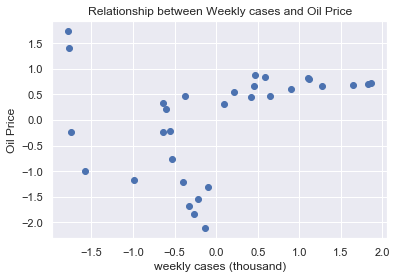

In [18]:
plt.title("Relationship between Weekly cases and Oil Price")
plt.xlabel("weekly cases (thousand)")
plt.ylabel("Oil Price")
plt.scatter(NewCase["Norm_Case"],NewCase["Norm_Oil"])
plt.show()

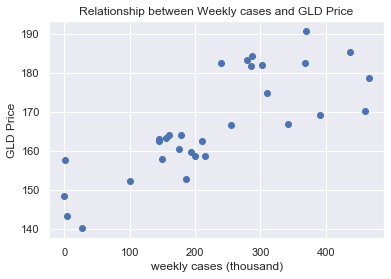

In [19]:
plt.title("Relationship between Weekly cases and GLD Price")
plt.scatter(NewCase["weekly"]/1000,NewCase["GLD"])
plt.xlabel("weekly cases (thousand)")
plt.ylabel("GLD Price")
plt.show()

In [56]:
import statsmodels.formula.api as smf
model = smf.gls("Norm_GLD ~ Norm_Case", data=NewCase).fit()
print(model.summary())

                            GLS Regression Results                            
Dep. Variable:               Norm_GLD   R-squared:                       0.631
Model:                            GLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     49.66
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           9.45e-08
Time:                        21:36:51   Log-Likelihood:                -28.521
No. Observations:                  31   AIC:                             61.04
Df Residuals:                      29   BIC:                             63.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.571e-15      0.113  -2.28e-14      1.0

In [57]:
model = smf.gls("Norm_Oil ~ Norm_Case", data=NewCase).fit()
print(model.summary())

                            GLS Regression Results                            
Dep. Variable:               Norm_Oil   R-squared:                       0.080
Model:                            GLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.509
Date:                Mon, 19 Oct 2020   Prob (F-statistic):              0.124
Time:                        21:38:21   Log-Likelihood:                -42.701
No. Observations:                  31   AIC:                             89.40
Df Residuals:                      29   BIC:                             92.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.331e-16      0.178   1.87e-15      1.0